# ***Pokémon - Análise Descritiva***

Descrição do Projeto: Projeto de análise descritiva de um dataset de Pokémon, da geração I a VI.

Dataset encontrado da internet (GitHub).

Dicionário de Dados:

* *#*: Número do Pokémon em sua ordem oficial.
* *Name*: Nome do Pokémon.
* *Type 1*: Tipo primário do Pokémon.
* *Type 2*: Tipo secundário do Pokémon. Pode ou não ser nulo.
* *Total*: Soma de pontos de todos os atributos do Pokémon.
* *HP*: Pontos de vida base do Pokémon.
* *Attack*: Pontos de ataque base do Pokémon.
* *Defense*: Pontos de defesa base do Pokémon.
* *Sp. Atk*: Pontos de ataque especial base do Pokémon.
* *Sp. Def*: Pontos de defesa especial base do Pokémon.
* *Speed*: Pontos de velocidade base do Pokémon.
* *Generation*: Geração a qual o Pokémon pertence.
* *Legendary*: Variável binária com "False" se o Pokémon não é lendário, e "True" se ele for.

## Importação de bibliotecas e tratamento de dados

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Carregando a base para um dataframe pandas
pokedex = pd.read_csv('./data/dados_pokemon.csv')

In [3]:
# Observar as primeiras 5 linhas
pokedex.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Renomear as colunas para o português e facilitar o código
pokedex.columns = ['numeracao', 
                 'nome', 
                 'tipo1', 
                 'tipo2', 
                 'status_total', 
                 'vida', 
                 'ataque', 
                 'defesa', 
                 'atq_especial',
                 'def_especial',
                 'velocidade',
                 'geracao',
                 'lendario']
pokedex.head()

,numeracao,nome,tipo1,tipo2,status_total,vida,ataque,defesa,atq_especial,def_especial,velocidade,geracao,lendario
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
# Trazer todos os tipos únicos do tipo1
pokedex['tipo1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [6]:
# Renomear os tipos para português, tanto para o tipo1 quanto para o tipo2
pokedex['tipo1'] = pokedex['tipo1'].map({'Grass': 'Grama',
                                         'Fire': 'Fogo',
                                         'Water': 'Aquático',
                                         'Bug': 'Inseto',
                                         'Normal': 'Normal',
                                         'Poison': 'Venenoso',
                                         'Electric': 'Elétrico',
                                         'Ground': 'Terra',
                                         'Fairy': 'Fada',
                                         'Fighting': 'Lutador',
                                         'Psychic': 'Psíquico',
                                         'Rock': 'Pedra',
                                         'Ghost': 'Fantasma',
                                         'Ice': 'Gelo',
                                         'Dragon': 'Dragão',
                                         'Dark': 'Trevas',
                                         'Steel': 'Aço',
                                         'Flying': 'Voador',})
pokedex['tipo1'].unique()

array(['Grama', 'Fogo', 'Aquático', 'Inseto', 'Normal', 'Venenoso',
       'Elétrico', 'Terra', 'Fada', 'Lutador', 'Psíquico', 'Pedra',
       'Fantasma', 'Gelo', 'Dragão', 'Trevas', 'Aço', 'Voador'],
      dtype=object)

In [7]:
pokedex['tipo2'] = pokedex['tipo2'].map({'Grass': 'Grama',
                                         'Fire': 'Fogo',
                                         'Water': 'Aquático',
                                         'Bug': 'Inseto',
                                         'Normal': 'Normal',
                                         'Poison': 'Venenoso',
                                         'Electric': 'Elétrico',
                                         'Ground': 'Terra',
                                         'Fairy': 'Fada',
                                         'Fighting': 'Lutador',
                                         'Psychic': 'Psíquico',
                                         'Rock': 'Pedra',
                                         'Ghost': 'Fantasma',
                                         'Ice': 'Gelo',
                                         'Dragon': 'Dragão',
                                         'Dark': 'Trevas',
                                         'Steel': 'Aço',
                                         'Flying': 'Voador',})
pokedex['tipo2'].unique()

array(['Venenoso', nan, 'Voador', 'Dragão', 'Terra', 'Fada', 'Grama',
       'Lutador', 'Psíquico', 'Aço', 'Gelo', 'Pedra', 'Trevas',
       'Aquático', 'Elétrico', 'Fogo', 'Fantasma', 'Inseto', 'Normal'],
      dtype=object)

In [8]:
pokedex.head()

,numeracao,nome,tipo1,tipo2,status_total,vida,ataque,defesa,atq_especial,def_especial,velocidade,geracao,lendario
0,1,Bulbasaur,Grama,Venenoso,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grama,Venenoso,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grama,Venenoso,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grama,Venenoso,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fogo,NaN,309,39,52,43,60,50,65,1,False


In [9]:
# Verificanndo número de linhas e colunas
pokedex.shape

(800, 13)

In [10]:
# Informações básicas das colunas e valores
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   numeracao     800 non-null    int64 
 1   nome          800 non-null    object
 2   tipo1         800 non-null    object
 3   tipo2         414 non-null    object
 4   status_total  800 non-null    int64 
 5   vida          800 non-null    int64 
 6   ataque        800 non-null    int64 
 7   defesa        800 non-null    int64 
 8   atq_especial  800 non-null    int64 
 9   def_especial  800 non-null    int64 
 10  velocidade    800 non-null    int64 
 11  geracao       800 non-null    int64 
 12  lendario      800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [11]:
# Avaliando valores faltantes
pokedex.isnull().sum()

numeracao         0
nome              0
tipo1             0
tipo2           386
status_total      0
vida              0
ataque            0
defesa            0
atq_especial      0
def_especial      0
velocidade        0
geracao           0
lendario          0
dtype: int64

Os valores faltantes na variável TIPO2 indicam que existem 386 Pokémon que fazem parte do grupo com apenas um tipo.

## Analisando os dados

> #### Quantos Pokémon possuem um só tipo?
***

In [12]:
# Verificando quais Pokémon só tem um tipo
pokemon_monotype = pokedex[pokedex['tipo2'].isnull()]
pokemon_monotype

,numeracao,nome,tipo1,tipo2,status_total,vida,ataque,defesa,atq_especial,def_especial,velocidade,geracao,lendario
4,4,Charmander,Fogo,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fogo,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Aquático,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Aquático,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Aquático,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragão,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragão,NaN,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Gelo,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Gelo,NaN,514,95,117,184,44,46,28,6,False


In [13]:
# Qtde. dos Pokémon com um tipo
pokemon_monotype['tipo1'].value_counts()

Normal      61
Aquático    59
Psíquico    38
Grama       33
Fogo        28
Elétrico    27
Lutador     20
Inseto      17
Fada        15
Venenoso    15
Terra       13
Gelo        13
Dragão      11
Fantasma    10
Trevas      10
Pedra        9
Aço          5
Voador       2
Name: tipo1, dtype: int64

In [14]:
# Criando a ordem para plotar a qtde. de Pokémon que são apenas de um tipo por tipo
plot_order = pokemon_monotype['tipo1'].value_counts().index
plot_order

Index(['Normal', 'Aquático', 'Psíquico', 'Grama', 'Fogo', 'Elétrico',
       'Lutador', 'Inseto', 'Fada', 'Venenoso', 'Terra', 'Gelo', 'Dragão',
       'Fantasma', 'Trevas', 'Pedra', 'Aço', 'Voador'],
      dtype='object')

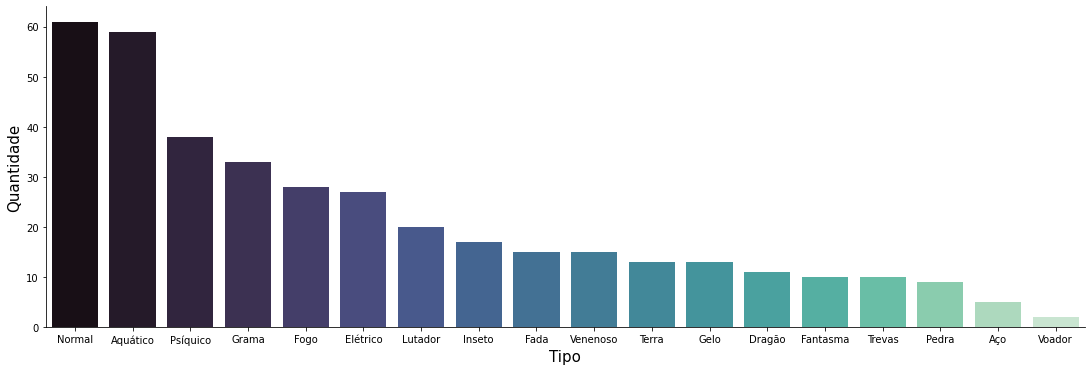

In [15]:
# Plotando a qtde. de Pokémon com um tipo
plot_monotype = sns.catplot(x = 'tipo1',
                            kind = 'count',
                            data = pokemon_monotype,
                            aspect = 3,
                            palette = 'mako',
                            order = plot_order)

plot_monotype.set_xlabels('Tipo', fontsize = 15)
plot_monotype.set_ylabels('Quantidade', fontsize = 15)

> #### Quantos Pokémon possuem dois tipos?
***

In [16]:
# Verificando quais Pokémon tem dois tipos
pokemon_duotype = pokedex[pokedex['tipo2'].notnull()]
pokemon_duotype

,numeracao,nome,tipo1,tipo2,status_total,vida,ataque,defesa,atq_especial,def_especial,velocidade,geracao,lendario
0,1,Bulbasaur,Grama,Venenoso,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grama,Venenoso,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grama,Venenoso,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grama,Venenoso,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fogo,Voador,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Pedra,Fada,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Pedra,Fada,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psíquico,Fantasma,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psíquico,Trevas,680,80,160,60,170,130,80,6,True


In [17]:
# Criando um crosstab para ver a qtde. exata
duotype_count = pd.crosstab(pokedex.tipo1,
                            pokedex.tipo2,
                            rownames = ['Tipo Primário'],
                            colnames = ['Tipo Secundário'])

duotype_count

Tipo Secundário,Aquático,Aço,Dragão,Elétrico,Fada,Fantasma,Fogo,Gelo,Grama,Inseto,Lutador,Normal,Pedra,Psíquico,Terra,Trevas,Venenoso,Voador
Tipo Primário,,,,,,,,,,,,,,,,,,
Aquático,0,1,2,2,2,2,0,3,3,0,3,0,4,5,10,6,3,7
Aço,0,0,1,0,3,4,0,0,0,0,1,0,3,7,2,0,0,1
Dragão,0,0,0,1,1,0,1,3,0,0,0,0,0,4,5,0,0,6
Elétrico,1,3,1,0,1,1,1,1,1,0,0,2,0,0,0,0,0,5
Fada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Fantasma,0,0,2,0,0,0,3,0,10,0,0,0,0,0,0,1,4,2
Fogo,1,1,1,0,0,0,0,0,0,0,7,2,1,2,3,0,0,6
Gelo,3,0,0,0,0,1,0,0,0,0,0,0,0,2,3,0,0,2
Grama,0,2,1,0,2,0,0,3,0,0,3,0,0,2,1,3,15,5


<AxesSubplot:xlabel='Tipo Secundário', ylabel='Tipo Primário'>

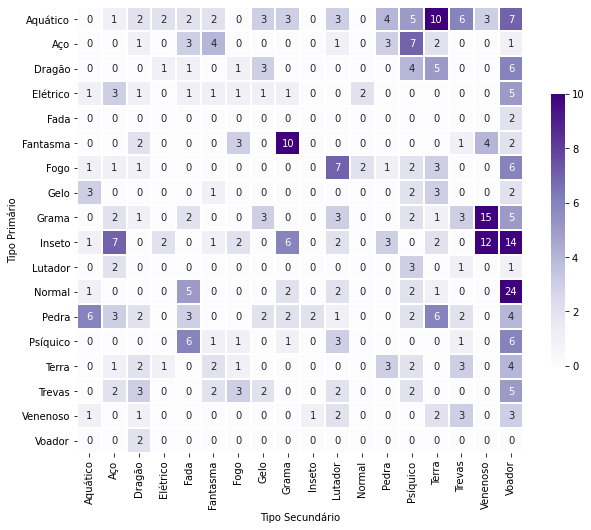

In [18]:
# Plotando a qtde. de Pokémon com dois tipos utilizando o crosstab
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data = duotype_count,
            cmap="Purples",
            vmin= 0,
            vmax= 10,
            linewidth=1,
            square = True,
            annot=True,
            cbar_kws={"shrink": .5})

> #### Quantos Pokémon de cada tipo existem no total (considerar tipos primários e secundários juntos)?
***

In [19]:
# Distribuição de variáveis dos tipos
print(pokedex['tipo1'].value_counts().sort_values(ascending = False))
print(pokedex['tipo2'].value_counts().sort_values(ascending = False))

Aquático    112
Normal       98
Grama        70
Inseto       69
Psíquico     57
Fogo         52
Pedra        44
Elétrico     44
Dragão       32
Fantasma     32
Terra        32
Trevas       31
Venenoso     28
Lutador      27
Aço          27
Gelo         24
Fada         17
Voador        4
Name: tipo1, dtype: int64
Voador      97
Terra       35
Venenoso    34
Psíquico    33
Lutador     26
Grama       25
Fada        23
Aço         22
Trevas      20
Dragão      18
Fantasma    14
Pedra       14
Gelo        14
Aquático    14
Fogo        12
Elétrico     6
Normal       4
Inseto       3
Name: tipo2, dtype: int64


In [20]:
# Calculando o total de tipos existentes
A = pokedex['tipo1'].value_counts()
B = pokedex['tipo2'].value_counts()
total_tipos_pokemon = A + B
total_tipos_pokemon.sort_values(ascending = False, inplace = True)

<AxesSubplot:>

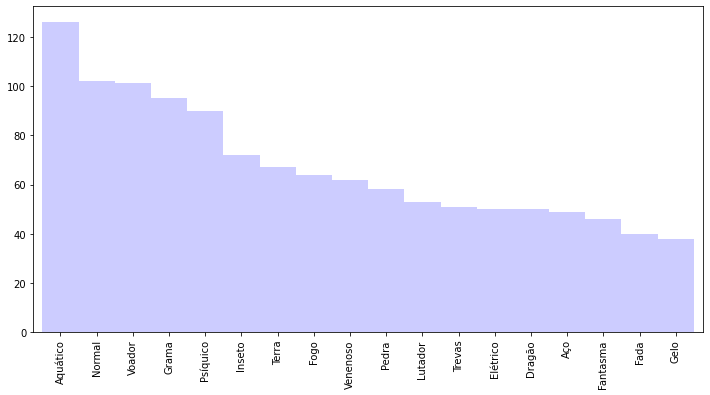

In [21]:
# Plotando com matplotlib
total_tipos_pokemon.plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize = (12, 6))

<AxesSubplot:>

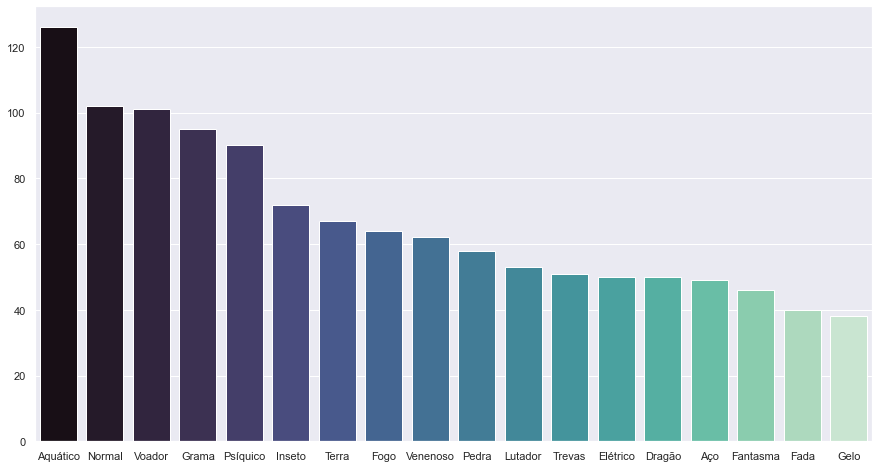

In [22]:
# Plotando com seaborn
sns.set(rc={'figure.figsize':(15, 8)})
sns.barplot(x=total_tipos_pokemon.index,
            y=total_tipos_pokemon.values,
            palette = 'mako')

> #### Quantos Pokémon tem em cada geração? Qual a geração com a média de Status Points total maior?
***

In [23]:
pokedex.geracao.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [24]:
# Agrupando os Pokémon por geração
qtde_geracao = pokedex.groupby('geracao')['nome'].count()
qtde_geracao

geracao
1    166
2    106
3    160
4    121
5    165
6     82
Name: nome, dtype: int64

[Text(0.5, 0, 'Geração'), Text(0, 0.5, 'Quantidade')]

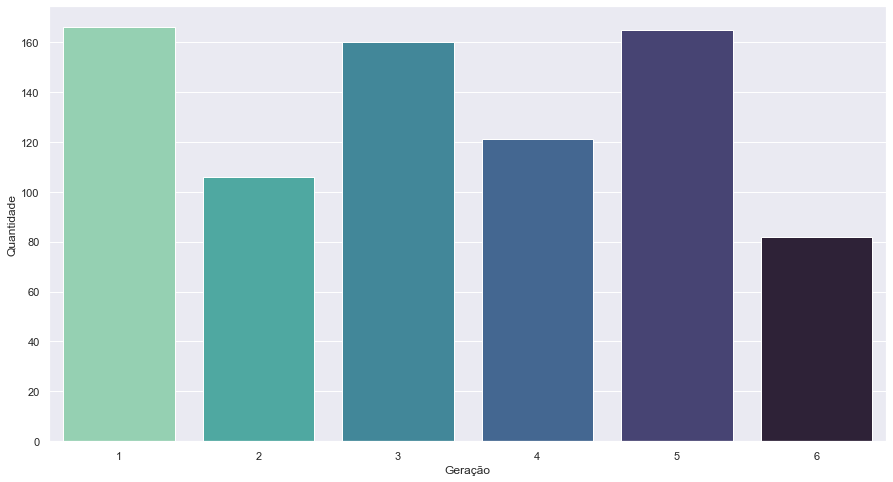

In [25]:
# Plotando gráfico
sns.set(rc={'figure.figsize':(15, 8)})
qtde_geracao_ax = sns.barplot(x=qtde_geracao.index,
                              y=qtde_geracao.values,
                              palette = 'mako_r')

qtde_geracao_ax.set(xlabel='Geração', ylabel='Quantidade')

In [26]:
print('A geração que tem a maior média em relação ao total de Status Points é a %d, no valor de %.2f.' % 
      (pokedex.groupby('geracao')['status_total'].mean().sort_values().index[-1],
       pokedex.groupby('geracao')['status_total'].mean().max()))

A geração que tem a maior média em relação ao total de Status Points é a 4, no valor de 459.02.


> #### Quantos Pokémon são lendários?
***

In [27]:
# Separando e criando um DataFrame só com os Pokémon lendários
todos_lendarios = pokedex[pokedex.lendario == True]
todos_lendarios['nome']

156               Articuno
157                 Zapdos
158                Moltres
162                 Mewtwo
163    MewtwoMega Mewtwo X
              ...         
795                Diancie
796    DiancieMega Diancie
797    HoopaHoopa Confined
798     HoopaHoopa Unbound
799              Volcanion
Name: nome, Length: 65, dtype: object

In [28]:
print('Há um total de %d Pokémon lendários no DataFrame.' % todos_lendarios['nome'].count())

Há um total de 65 Pokémon lendários no DataFrame.


> #### Baseado na velocidade, separe os Pokémon que tem um valor maior ou igual a 100 em um DataFrame separado.
***

In [29]:
pokemon_velozes = pokedex[pokedex.velocidade >= 100]
pokemon_velozes

,numeracao,nome,tipo1,tipo2,status_total,vida,ataque,defesa,atq_especial,def_especial,velocidade,geracao,lendario
6,6,Charizard,Fogo,Voador,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fogo,Dragão,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fogo,Voador,634,78,104,78,159,115,100,1,False
19,15,BeedrillMega Beedrill,Inseto,Venenoso,495,65,150,40,15,80,145,1,False
22,18,Pidgeot,Normal,Voador,479,83,80,75,70,70,101,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,695,Heliolisk,Elétrico,Normal,481,62,55,52,109,94,109,6,False
771,701,Hawlucha,Lutador,Voador,500,78,92,75,74,63,118,6,False
772,702,Dedenne,Elétrico,Fada,431,67,58,57,81,67,101,6,False
791,715,Noivern,Voador,Dragão,535,85,70,80,97,80,123,6,False


> #### Baseado na soma do ataque e ataque especial, separe os Pokémon que tem um valor maior ou igual a 200 em um DataFrame separado.
***

In [30]:
# Copiando o DataFrame original em um completamente novo
pokedex_atq = pokedex.copy(deep = True) # True já é por default
pokedex_atq

,numeracao,nome,tipo1,tipo2,status_total,vida,ataque,defesa,atq_especial,def_especial,velocidade,geracao,lendario
0,1,Bulbasaur,Grama,Venenoso,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grama,Venenoso,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grama,Venenoso,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grama,Venenoso,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fogo,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Pedra,Fada,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Pedra,Fada,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psíquico,Fantasma,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psíquico,Trevas,680,80,160,60,170,130,80,6,True


In [31]:
# Criando uma nova coluna no DataFrame novo para usá-lo como referência
for index, row in pokedex_atq.iterrows():
    pokedex_atq.loc[index, 'atq_soma'] = row['ataque'] + row['atq_especial']

pokedex_atq['atq_soma'] = pokedex_atq['atq_soma'].astype(int)
pokedex_atq

,numeracao,nome,tipo1,tipo2,status_total,vida,ataque,defesa,atq_especial,def_especial,velocidade,geracao,lendario,atq_soma
0,1,Bulbasaur,Grama,Venenoso,318,45,49,49,65,65,45,1,False,114
1,2,Ivysaur,Grama,Venenoso,405,60,62,63,80,80,60,1,False,142
2,3,Venusaur,Grama,Venenoso,525,80,82,83,100,100,80,1,False,182
3,3,VenusaurMega Venusaur,Grama,Venenoso,625,80,100,123,122,120,80,1,False,222
4,4,Charmander,Fogo,NaN,309,39,52,43,60,50,65,1,False,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Pedra,Fada,600,50,100,150,100,150,50,6,True,200
796,719,DiancieMega Diancie,Pedra,Fada,700,50,160,110,160,110,110,6,True,320
797,720,HoopaHoopa Confined,Psíquico,Fantasma,600,80,110,60,150,130,70,6,True,260
798,720,HoopaHoopa Unbound,Psíquico,Trevas,680,80,160,60,170,130,80,6,True,330


In [32]:
# Utilizando a nova coluna para fazer a filtragem
pokemon_ofensivos = pokedex_atq[pokedex_atq['atq_soma'] >= 200]
pokemon_ofensivos

,numeracao,nome,tipo1,tipo2,status_total,vida,ataque,defesa,atq_especial,def_especial,velocidade,geracao,lendario,atq_soma
3,3,VenusaurMega Venusaur,Grama,Venenoso,625,80,100,123,122,120,80,1,False,222
7,6,CharizardMega Charizard X,Fogo,Dragão,634,78,130,111,130,85,100,1,False,260
8,6,CharizardMega Charizard Y,Fogo,Voador,634,78,104,78,159,115,100,1,False,263
12,9,BlastoiseMega Blastoise,Aquático,NaN,630,79,103,120,135,115,78,1,False,238
23,18,PidgeotMega Pidgeot,Normal,Voador,579,83,80,80,135,80,121,1,False,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Pedra,Fada,600,50,100,150,100,150,50,6,True,200
796,719,DiancieMega Diancie,Pedra,Fada,700,50,160,110,160,110,110,6,True,320
797,720,HoopaHoopa Confined,Psíquico,Fantasma,600,80,110,60,150,130,70,6,True,260
798,720,HoopaHoopa Unbound,Psíquico,Trevas,680,80,160,60,170,130,80,6,True,330


## Distribuição de Frequências Quantitativas

> #### Classifique os Pokémon entre Uber, OU (OverUsed), UU (UnderUsed), RU (RarelyUsed) e NU (NeverUsed) de acordo com o total de Status Points.
***
Referência das classificações: https://www.smogon.com/bw/articles/bw_tiers

In [33]:
pokedex.status_total.min()

180

In [34]:
pokedex.status_total.max()

780

In [35]:
# Criando os limites de classe
classes = [pokedex.status_total.min(),
           199,
           349,
           549,
           699,
           pokedex.status_total.max()]

classes

[180, 199, 349, 549, 699, 780]

In [36]:
# Criando os labels para cada classe
labels = ['NU',
          'RU',
          'UU',
          'OU',
          'Uber']

labels

['NU', 'RU', 'UU', 'OU', 'Uber']

In [37]:
# Criando a Series de frequência
frequencia = pd.value_counts(
  pd.cut(x = pokedex.status_total,
         bins = classes,
         labels = labels,
         include_lowest = True)
)

frequencia

UU      437
RU      233
OU      108
Uber     15
NU        7
Name: status_total, dtype: int64

In [38]:
# Criando a Series de percentuais
percentual = pd.value_counts(
  pd.cut(x = pokedex.status_total,
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True # o parâmetro normalize no value_counts fará retornar um objeto com as frequências relativas dos valores únicos
) * 100

percentual

UU      54.625
RU      29.125
OU      13.500
Uber     1.875
NU       0.875
Name: status_total, dtype: float64

In [39]:
# Criando o df personalizado com as informações de distribuição de frequência
dist_freq_quantitativas_pokemon = pd.DataFrame(
    {'Frequência': frequencia, 'Percentual (%)': percentual}
)

dist_freq_quantitativas_pokemon.rename_axis('Classificação', axis = 'columns', inplace = True)
dist_freq_quantitativas_pokemon.sort_index(ascending = False)

Classificação,Frequência,Percentual (%)
Uber,15,1.875
OU,108,13.500
UU,437,54.625
RU,233,29.125
NU,7,0.875


<AxesSubplot:ylabel='Frequência'>

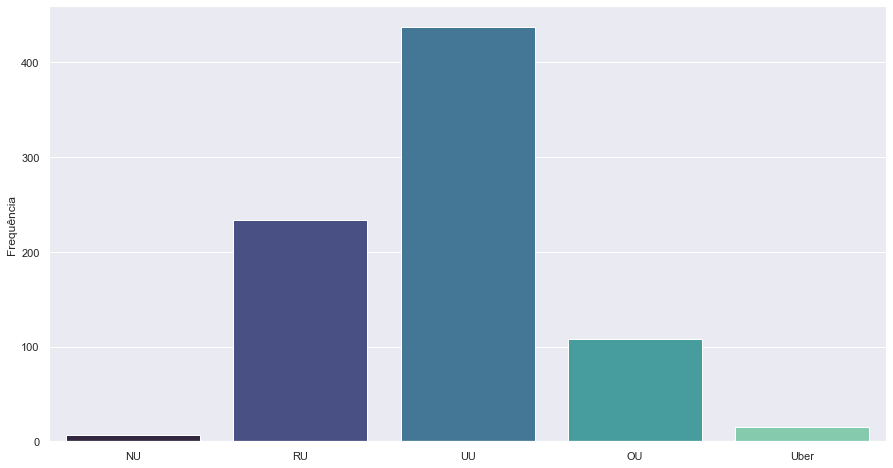

In [40]:
# Plotando a frequência
sns.barplot(x = dist_freq_quantitativas_pokemon.index,
            y = dist_freq_quantitativas_pokemon['Frequência'],
            palette = 'mako')

<AxesSubplot:ylabel='Percentual (%)'>

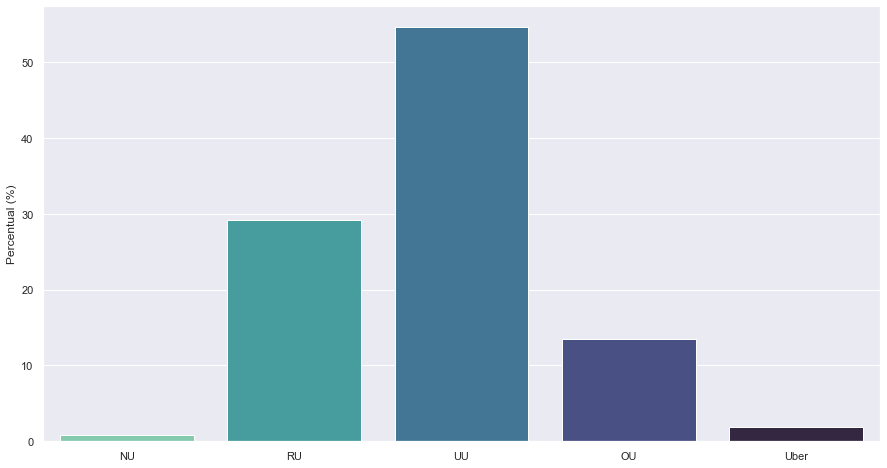

In [41]:
# Plotando o percentual
sns.barplot(x = dist_freq_quantitativas_pokemon.index,
            y = dist_freq_quantitativas_pokemon['Percentual (%)'],
            palette = 'mako_r')

> #### Utilizando o DataFrame criado para os Pokémon lendários, separe os Ubers dos não Ubers.
***

In [42]:
uber_lendarios = todos_lendarios[todos_lendarios['status_total'] > 699]
uber_lendarios

,numeracao,nome,tipo1,tipo2,status_total,vida,ataque,defesa,atq_especial,def_especial,velocidade,geracao,lendario
163,150,MewtwoMega Mewtwo X,Psíquico,Lutador,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psíquico,NaN,780,106,150,70,194,120,140,1,True
418,380,LatiasMega Latias,Dragão,Psíquico,700,80,100,120,140,150,110,3,True
420,381,LatiosMega Latios,Dragão,Psíquico,700,80,130,100,160,120,110,3,True
422,382,KyogrePrimal Kyogre,Aquático,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Terra,Fogo,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragão,Voador,780,105,180,100,180,100,115,3,True
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
711,646,KyuremBlack Kyurem,Dragão,Gelo,700,125,170,100,120,90,95,5,True
712,646,KyuremWhite Kyurem,Dragão,Gelo,700,125,120,90,170,100,95,5,True


In [43]:
nao_uber_lendarios = todos_lendarios[todos_lendarios['status_total'] <= 699]
nao_uber_lendarios

,numeracao,nome,tipo1,tipo2,status_total,vida,ataque,defesa,atq_especial,def_especial,velocidade,geracao,lendario
156,144,Articuno,Gelo,Voador,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Elétrico,Voador,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fogo,Voador,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psíquico,NaN,680,106,110,90,154,90,130,1,True
262,243,Raikou,Elétrico,NaN,580,90,85,75,115,100,115,2,True
263,244,Entei,Fogo,NaN,580,115,115,85,90,75,100,2,True
264,245,Suicune,Aquático,NaN,580,100,75,115,90,115,85,2,True
269,249,Lugia,Psíquico,Voador,680,106,90,130,90,154,110,2,True
270,250,Ho-oh,Fogo,Voador,680,106,130,90,110,154,90,2,True
414,377,Regirock,Pedra,NaN,580,80,100,200,50,100,50,3,True


> #### Crie um histograma para o STATUS_TOTAL.
***

<AxesSubplot:title={'center':'Distribuição de Frequências - Total de Status Points'}, xlabel='Status Points', ylabel='Quantidade'>

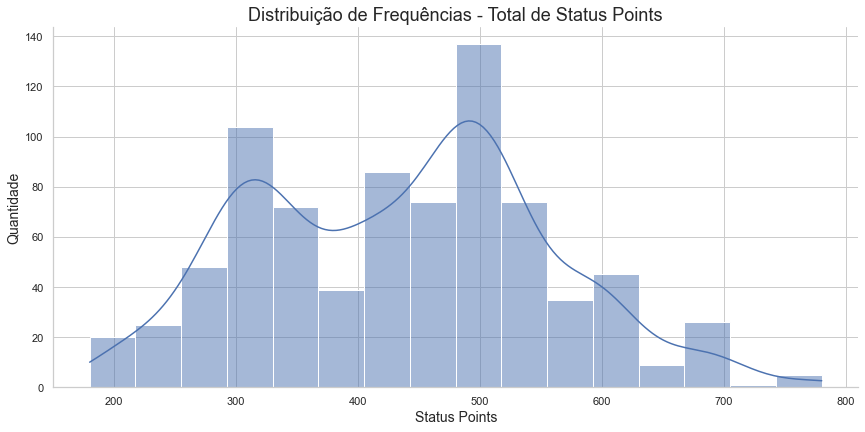

In [44]:
# Criando o histograma
sns.set_style('whitegrid')

grid = sns.displot(pokedex.status_total,
                   kde = True)

ax = grid.ax
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - Total de Status Points', fontsize=18)
ax.set_ylabel('Quantidade', fontsize=14)
ax.set_xlabel('Status Points', fontsize=14)
ax


# A maneira abaixo será depreciada futuramente
# ax = sns.distplot(pokedex['status_total'])
# ax.figure.set_size_inches(14, 6)
# ax.set_title('Distribuição de Frequências - Idade')
# ax.set_xlabel('Anos', fontsize = 14)
# ax

> #### Para a variável STATUS_TOTAL, construa um histograma somente com as informações dos Pokémon com Status Points entre o valor mínimo a 500.
***

<AxesSubplot:title={'center':'Distribuição de Frequências - Total de Status Points entre o valor mínimo e 500'}, xlabel='Status Points', ylabel='Quantidade'>

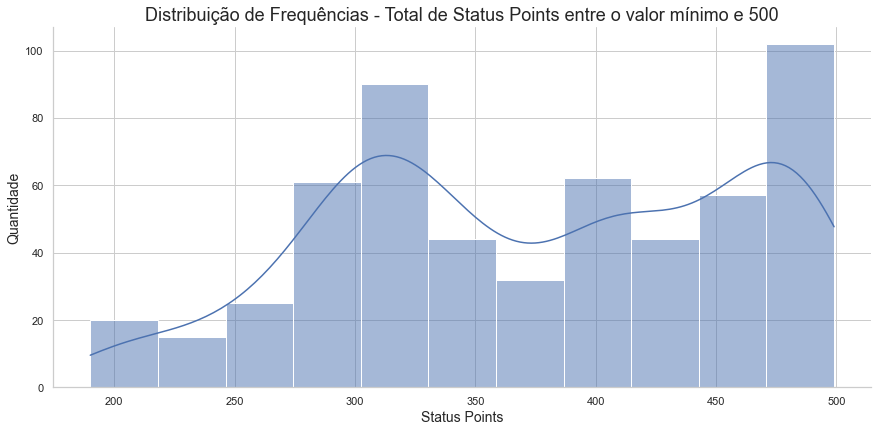

In [45]:
# Utilizando query() para poder satisfazer as condições e plotar o gráfico
grid = sns.displot(pokedex.query('status_total.min() < status_total < 500').status_total, 
                   kde = True)

ax = grid.ax
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - Total de Status Points entre o valor mínimo e 500', fontsize=18)
ax.set_ylabel('Quantidade', fontsize=14)
ax.set_xlabel('Status Points', fontsize=14)
ax

> #### Construa uma tabela de frequências e outra de percentuais cruzando as duas variáveis LENDARIO e GERACAO.
***

In [46]:
# Utilizando crosstab() para o cruzamento de dados
frequencia_cruz = pd.crosstab(pokedex.lendario,
                              pokedex.geracao,
                              rownames = ['Lendário?'],
                              colnames = ['Geração'])

frequencia_cruz.rename(index = {False: 'Não', True: 'Sim'}, inplace = True)

frequencia_cruz

Geração,1,2,3,4,5,6
Lendário?,,,,,,
Não,160,101,142,108,150,74
Sim,6,5,18,13,15,8


In [47]:
# Fazendo o mesmo para percentual
percentual_cruz = pd.crosstab(pokedex.lendario,
                              pokedex.geracao,
                              rownames = ['Lendário?'],
                              colnames = ['Geração'],
                              normalize = True) * 100
                        
percentual_cruz.rename(index = {False: 'Não', True: 'Sim'}, inplace = True)

percentual_cruz

Geração,1,2,3,4,5,6
Lendário?,,,,,,
Não,20.00,12.625,17.75,13.500,18.750,9.25
Sim,0.75,0.625,2.25,1.625,1.875,1.00


## Medidas de Tendência Central

> #### Tirar a média, mediana e moda da variável STATUS_TOTAL do DataFrame.
***

In [48]:
print('A média da variável status_total é %.2f.' % pokedex.status_total.mean())
print('A mediana da variável status_total é %d.' % pokedex.status_total.median())
print('A moda da variável status_total é %d.' % pokedex.status_total.mode().item())

A média da variável status_total é 435.10.
A mediana da variável status_total é 450.
A moda da variável status_total é 600.


> #### Cruzando as variáveis LENDARIO e GERACAO novamente, determine a média, mediana e valor máximo de STATUS_TOTAL de cada um.
***

In [49]:
# Utilizando o parâmetro aggfunc para as medidas de tendência central (menos moda)
status_total_estatistica_tendencia_central = pd.crosstab(pokedex.lendario,
                                                         pokedex.geracao,
                                                         aggfunc = {'mean', 'median', 'max'},
                                                         values = pokedex.status_total,
                                                         rownames = ['Lendário?'],
                                                         colnames = ['Geração'])

status_total_estatistica_tendencia_central.rename(index = {False: 'Não', True: 'Sim'}, inplace = True)

status_total_estatistica_tendencia_central

max                                           mean             \
Geração        1      2      3      4      5      6           1          2   
Lendário?                                                                    
Não        640.0  700.0  700.0  700.0  600.0  600.0  417.943750  408.29703   
Sim        780.0  680.0  780.0  720.0  700.0  700.0  663.333333  620.00000   

                                                          median         \
Geração             3           4           5           6      1      2   
Lendário?                                                                 
Não        409.267606  437.879630  416.620000  414.094595  422.5  415.0   
Sim        648.888889  634.615385  618.666667  642.500000  630.0  580.0   

                                       
Geração        3      4      5      6  
Lendário?                              
Não        417.0  477.0  426.5  427.0  
Sim        600.0  600.0  600.0  640.0

## Medidas de Dispersão

> #### Tirar o desvio médio absoluto, variância e desvio padrão da variável STATUS_TOTAL do DataFrame.
***

In [50]:
print('O desvio médio absoluto da variável status_total é %.2f.' % pokedex.status_total.mad())
print('A variância da variável status_total é %.2f.' % pokedex.status_total.var())
print('O desvio padrão da variável status_total é %.2f.' % pokedex.status_total.std())

O desvio médio absoluto da variável status_total é 100.27.
A variância da variável status_total é 14391.13.
O desvio padrão da variável status_total é 119.96.


> #### Cruzando as variáveis LENDARIO e GERACAO novamente, determine o desvio médio absoluto, variância e desvio padrão de STATUS_TOTAL de cada um.
***

In [51]:
# Utilizando o parâmetro aggfunc para as medidas de dispersão
status_total_estatistica_medidas_dispersao = pd.crosstab(pokedex.lendario,
                                                            pokedex.geracao,
                                                            aggfunc = {'mad', 'var', 'std'},
                                                            values = pokedex.status_total,
                                                            rownames = ['Lendário?'],
                                                            colnames = ['Geração']).round(2)

status_total_estatistica_medidas_dispersao.rename(index = {False: 'Não', True: 'Sim'}, inplace = True)

status_total_estatistica_medidas_dispersao

mad                                        std                  \
Geração        1      2      3      4      5      6       1       2       3   
Lendário?                                                                     
Não        91.47  92.63  96.38  92.40  84.71  85.82  106.96  113.55  117.68   
Sim        83.33  48.00  60.99  46.51  43.56  42.50   98.32   54.77   70.53   

                                      var                                \
Geração         4      5      6         1         2         3         4   
Lendário?                                                                 
Não        107.46  94.35  96.44  11440.28  12893.57  13848.45  11547.88   
Sim         50.43  49.26  45.90   9666.67   3000.00   4975.16   2543.59   

                             
Geração          5        6  
Lendário?                    
Não        8902.20  9300.72  
Sim        2426.67  2107.14

## Medidas Separatrizes

> #### Determinar os quartis, decis e percentis da variável STATUS_TOTAL.
***

In [52]:
pokedex.status_total.quantile([0.25, 0.5, 0.75])

0.25    330.0
0.50    450.0
0.75    515.0
Name: status_total, dtype: float64

In [53]:
pokedex.status_total.quantile([i / 10 for i in range (1, 10)]) # utilizando uma list comprehension

0.1    288.0
0.2    313.0
0.3    349.7
0.4    405.0
0.5    450.0
0.6    480.0
0.7    500.0
0.8    528.0
0.9    600.0
Name: status_total, dtype: float64

In [54]:
pokedex.status_total.quantile([i / 100 for i in range (1, 100)])

0.01    200.00
0.02    210.00
0.03    220.00
0.04    244.96
0.05    250.00
         ...  
0.95    630.00
0.96    660.40
0.97    680.00
0.98    680.00
0.99    700.00
Name: status_total, Length: 99, dtype: float64

<AxesSubplot:title={'center':'Distribuição de Frequências Acumulada'}, xlabel='Status Points', ylabel='Acumulado'>

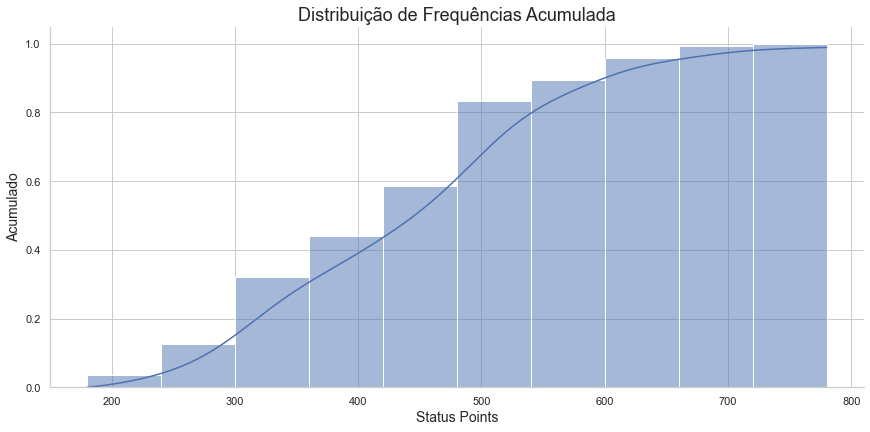

In [55]:
# Plotando um gráfico de distribuição de frequências acumulada
grid = sns.displot(pokedex.status_total, 
                   kde = True,
                   cumulative=True,
                   stat = 'density',
                   bins = 10)

ax = grid.ax
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Status Points', fontsize=14)
ax

> #### Construir um box plot da variável ATAQUE.
***

<AxesSubplot:title={'center':'Ataque'}, xlabel='Pontos de ataque'>

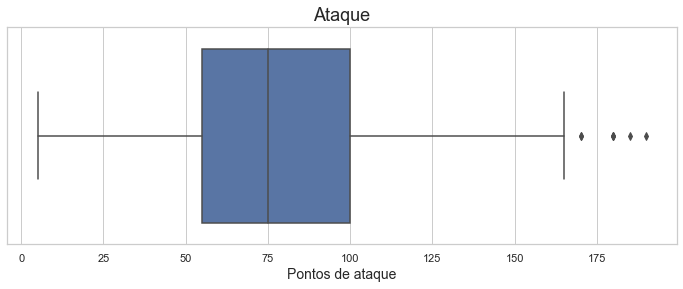

In [56]:
ax = sns.boxplot(x = 'ataque', data = pokedex, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Ataque', fontsize = 18)
ax.set_xlabel('Pontos de ataque', fontsize = 14)
ax

> #### A partir do box plot criado da variável ATAQUE, separe os valores Q1, Q2, IIQ, limites inferior e superior, e remova os outliers.
***

In [57]:
valor = pokedex['ataque']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

<AxesSubplot:title={'center':'Ataque'}, xlabel='Pontos de ataque'>

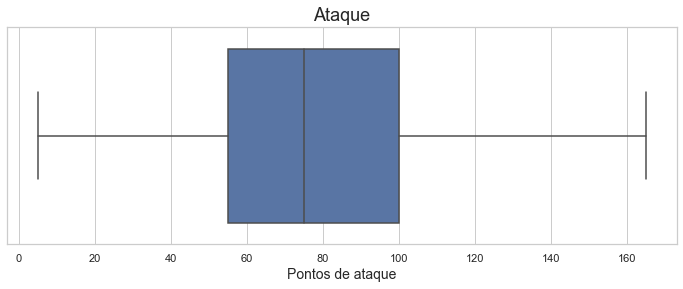

In [58]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
pokedex_new = pokedex[selecao]

ax = sns.boxplot(x = 'ataque', data = pokedex_new, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Ataque', fontsize = 18)
ax.set_xlabel('Pontos de ataque', fontsize = 14)
ax

> #### Construir um box plot da variável ATAQUE novamente, mas separando se o Pokémon é lendário ou não.
***

<AxesSubplot:title={'center':'Ataque'}, xlabel='Pontos de ataque', ylabel='Lendário?'>

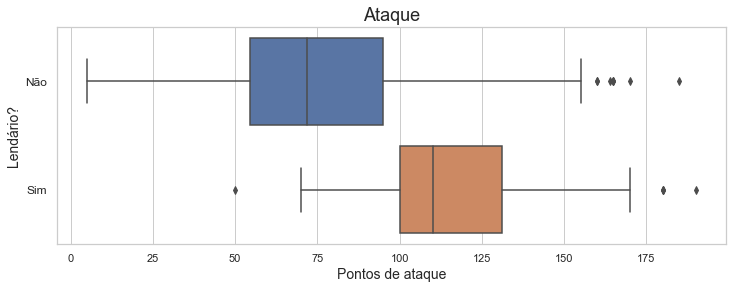

In [59]:
ax = sns.boxplot(x = 'ataque', y = 'lendario', data = pokedex, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Ataque', fontsize = 18)
ax.set_xlabel('Pontos de ataque', fontsize = 14)
ax.set_ylabel('Lendário?', fontsize = 14)
ax.set_yticklabels(['Não', 'Sim'], fontsize = 12)
ax

> #### Construir um box plot da variável STATUS_TOTAL de acordo com as variáveis LENDARIO e GERACAO, utilizando somente informações dos Pokémon com STATUS_TOTAL maior que 300.
***

<AxesSubplot:title={'center':'Box-plot do total de Status Points por Geração e se é Lendário ou não'}, xlabel='Status Points', ylabel='Geração'>

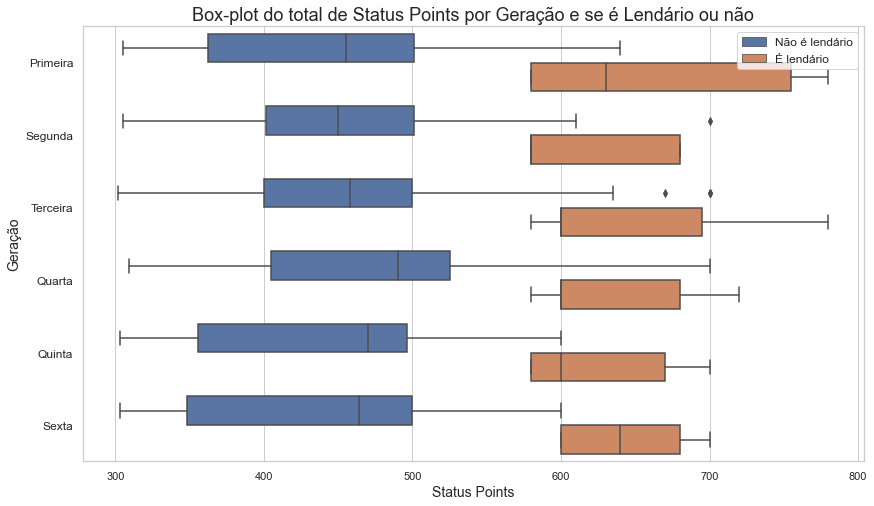

In [60]:
ax = sns.boxplot(x = 'status_total', y = 'geracao', hue = 'lendario', data = pokedex.query('status_total > 300'), orient = 'h')  # Configurações iniciais do plot

ax.figure.set_size_inches(14, 8) # Personalizando o tamanho da figura

ax.set_title('Box-plot do total de Status Points por Geração e se é Lendário ou não', fontsize = 18) # Configurando o título do gráfico

ax.set_xlabel('Status Points', fontsize = 14) # Configurando o label do eixo X

ax.set_ylabel('Geração', fontsize = 14) # Configurando o label do eixo Y

ax.set_yticklabels(['Primeira', 'Segunda', 'Terceira', 'Quarta', 'Quinta', 'Sexta'], fontsize = 12)  # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Lendário ou não)
handles, _ = ax.get_legend_handles_labels() # o _ significa, nesse caso, que não interessa o valor, então ele será vazio
ax.legend(handles, ['Não é lendário', 'É lendário'], fontsize = 12)

ax

> #### Qual percentual de Pokémon que tem velocidade de 30 pontos ou menos?
***

In [61]:
# Utilizando a função percentileofscore() do scipy
percentual_velocidade = stats.percentileofscore(pokedex.velocidade, 30, kind = 'weak')
print('O percentual de Pokémon que tem velocidade de 30 pontos ou menos é de {0:.2f}%.'.format(percentual_velocidade))

O percentual de Pokémon que tem velocidade de 30 pontos ou menos é de 10.88%.


> #### Qual o total de Status Points máximo que 99% dos Pokémon têm?
***

In [62]:
total_maximo = pokedex['status_total'].quantile(.99)
print('O total de Status Points máximo que 99% dos Pokémon têm é de {0:.0f} pontos.'.format(total_maximo))

O total de Status Points máximo que 99% dos Pokémon têm é de 700 pontos.


# ***Fim***